# **Simple Linear Regression using Least Square Method**
**Regression Line : y = a + b*x**

**where**  
**b = (xi-x')(yi-y')/(xi-x')^2**  
**a = y' - bx'**

**Sum of Least Square Method fits a line y=a+bx by minimizing the sum of squared residuals : minimize  ∑(yi​ −(a+bxi​))^2**

# **Importing libraries**

In [49]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# **Functions**

**Function for splitting data into training and testing data**

In [50]:
def train_test_split(x,y,test_size):
  n = int(len(x)*test_size)
  x_train = x[:n]
  x_test = x[n:]
  y_train = y[:n]
  y_test = y[n:]

  return x_train,x_test,y_train,y_test

**Function for fitting data to Linear Regressor Model**

In [51]:
def linear_regressor_fit(x_train,y_train):
  x_mean = np.mean(x_train)
  y_mean = np.mean(y_train)

  #b = (xi-x')(yi-y')/(xi-x')^2
  b = 0
  b += (np.sum(x_train-x_mean)*np.sum(y_train-y_mean))/np.sum(x_train-x_mean)**2
  b = round(b,2)

  #a = y' - bx'
  a = y_mean - b*x_mean
  a = round(a,2)

  return a,b

**Function for Predicting data**

In [52]:
def predict(a,b,y_test):
  y_pred = a + b*y_test
  return y_pred

**Function for calculating Mean Absolute Error**

In [53]:
def mean_squared_error(y_test,y_pred):
  return np.mean((y_test-y_pred)**2)

# **Creating & Evaluating Model**

In [54]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
x = df['total_bill']
y = df['tip']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [58]:
a,b = linear_regressor_fit(x_train,y_train)

y_pred = predict(a,b,y_test)

mae = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error : {mae:.4f}')

Mean Squared Error : 4.6953


Text(0, 0.5, 'Tip')

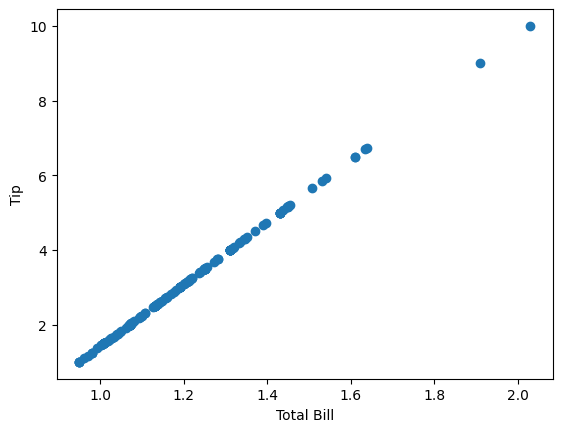

In [59]:
plt.scatter(y_pred,y_test)
plt.xlabel('Total Bill')
plt.ylabel('Tip')